Description Of the features of the dataset:


Y – Latitude coordinate of the observation station.

X – Longitude coordinate of the observation station.

data_payload_id – Unique identifier for the data record.

instance_datetime – Timestamp when the data was recorded.

url – URL reference to the data source.

agency – Organization responsible for the data.

platform_type – Type of platform (e.g., station, balloon, etc.).

platform_id – Numeric ID for the platform.

platform_name – Name of the observation platform or station.

gaw_id – Global Atmosphere Watch ID of the platform.

instrument_name – Name of the instrument used for measurement.

instrument_model – Model of the instrument.

instrument_number – Instrument's identification number.

monthly_date – Date associated with monthly aggregated data.

monthly_columno3 – Monthly average ozone column value.

monthly_stddevo3 – Standard deviation of the monthly ozone values.

monthly_npts – Number of observations used in monthly average.

daily_date – Date of the daily observation.

daily_wlcode – Wavelength code used during observation.

daily_obscode – Observation code (e.g., method or technique).

daily_columno3 – Daily ozone column measurement (Dobson Units).

daily_stddevo3 – Standard deviation of the daily ozone value.

daily_utc_begin – UTC time when observation began.

daily_utc_end – UTC time when observation ended.

daily_utc_mean – Mean UTC time of observation.

daily_nobs – Number of observations for that day.

daily_mmu – Measurement uncertainty for daily ozone.

daily_columnso2 – Daily SO₂ (sulfur dioxide) column measurement.

latest_observation – Flag indicating if this is the most recent data (0 or 1).

country – Country of the observation station.

scientific_authority – Name of the responsible scientist or authority.

version – Version number of the data record.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df=pd.read_csv('New Dataset/spain.csv')
df.head()


,Y,X,data_payload_id,instance_datetime,url,agency,platform_type,platform_id,platform_name,gaw_id,...,daily_utc_begin,daily_utc_end,daily_utc_mean,daily_nobs,daily_mmu,daily_columnso2,latest_observation,country,scientific_authority,version
0,28.46,-16.25,2306481,2025/03/05 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,AEMET,STN,401,Santa Cruz (Tenerife),SCO,...,9.15,10.52,9.60,4.0,2.181,-0.5,0,ESP,MIGUEL HERNANDEZ MARTINEZ DE LA PEÑA,0.0
1,28.46,-16.25,2306502,2025/03/05 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,AEMET,STN,401,Santa Cruz (Tenerife),SCO,...,12.50,17.88,15.22,12.0,1.421,-1.4,0,ESP,MIGUEL HERNANDEZ MARTINEZ DE LA PEÑA,0.0
2,28.46,-16.25,2306482,2025/03/05 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,AEMET,STN,401,Santa Cruz (Tenerife),SCO,...,8.85,14.03,10.80,16.0,1.638,-0.9,0,ESP,MIGUEL HERNANDEZ MARTINEZ DE LA PEÑA,0.0
3,28.46,-16.25,2306480,2025/03/05 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,AEMET,STN,401,Santa Cruz (Tenerife),SCO,...,12.83,17.27,15.41,10.0,1.602,-0.6,0,ESP,MIGUEL HERNANDEZ MARTINEZ DE LA PEÑA,0.0
4,28.46,-16.25,2306483,2025/03/05 00:00:00+00,https://woudc.org/archive/Archive-NewFormat/To...,AEMET,STN,401,Santa Cruz (Tenerife),SCO,...,9.55,17.55,15.04,19.0,1.680,-0.8,0,ESP,MIGUEL HERNANDEZ MARTINEZ DE LA PEÑA,0.0


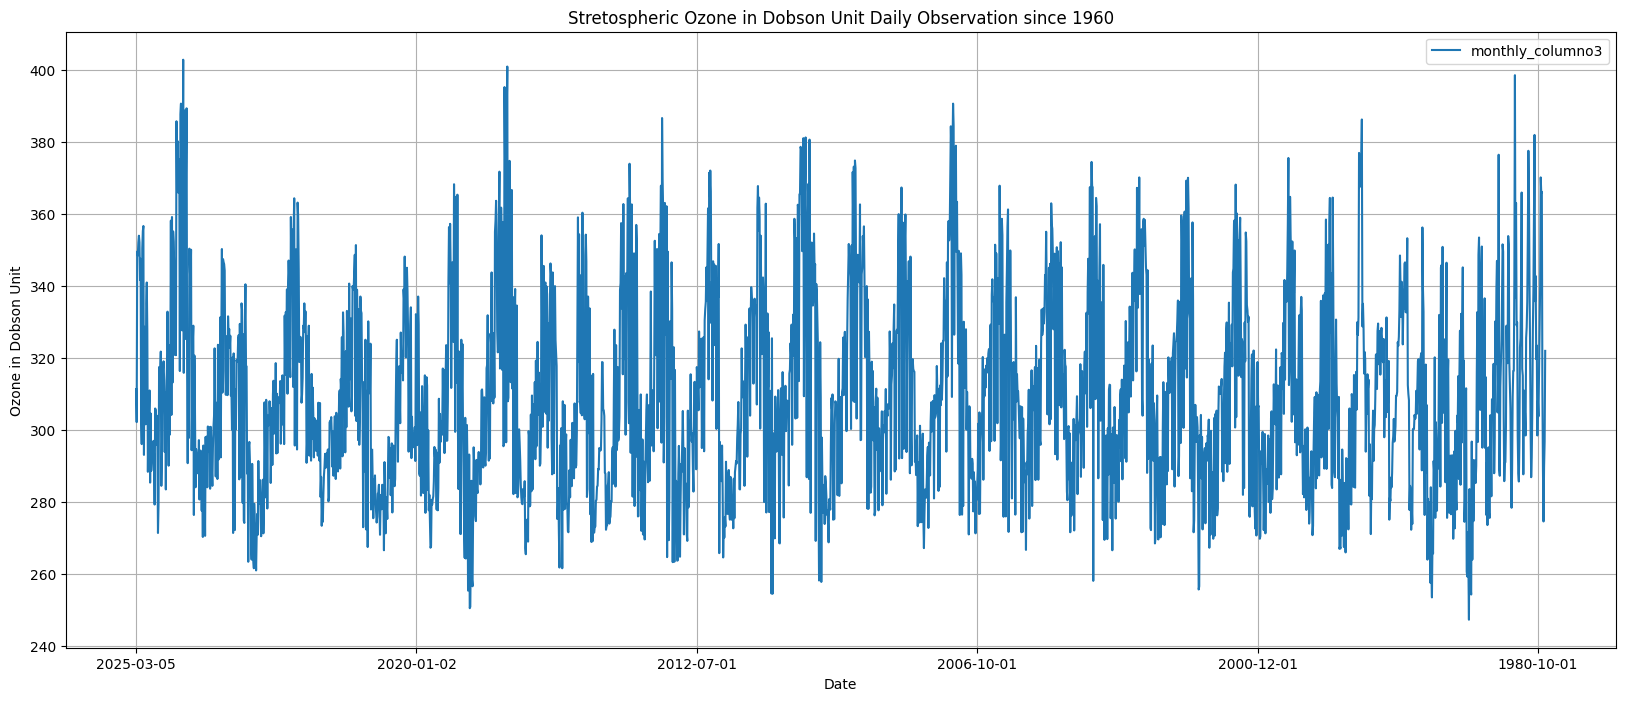

In [33]:
df_montly=df.copy()
df_montly=df_montly.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
        'monthly_stddevo3', 'monthly_npts','daily_date','daily_columno3',
        'daily_wlcode', 'daily_obscode', 
       'daily_stddevo3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_montly.head()
df_montly = df_montly.drop_duplicates()
df_montly = df_montly.set_index('monthly_date')

df_montly.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit')
plt.grid()


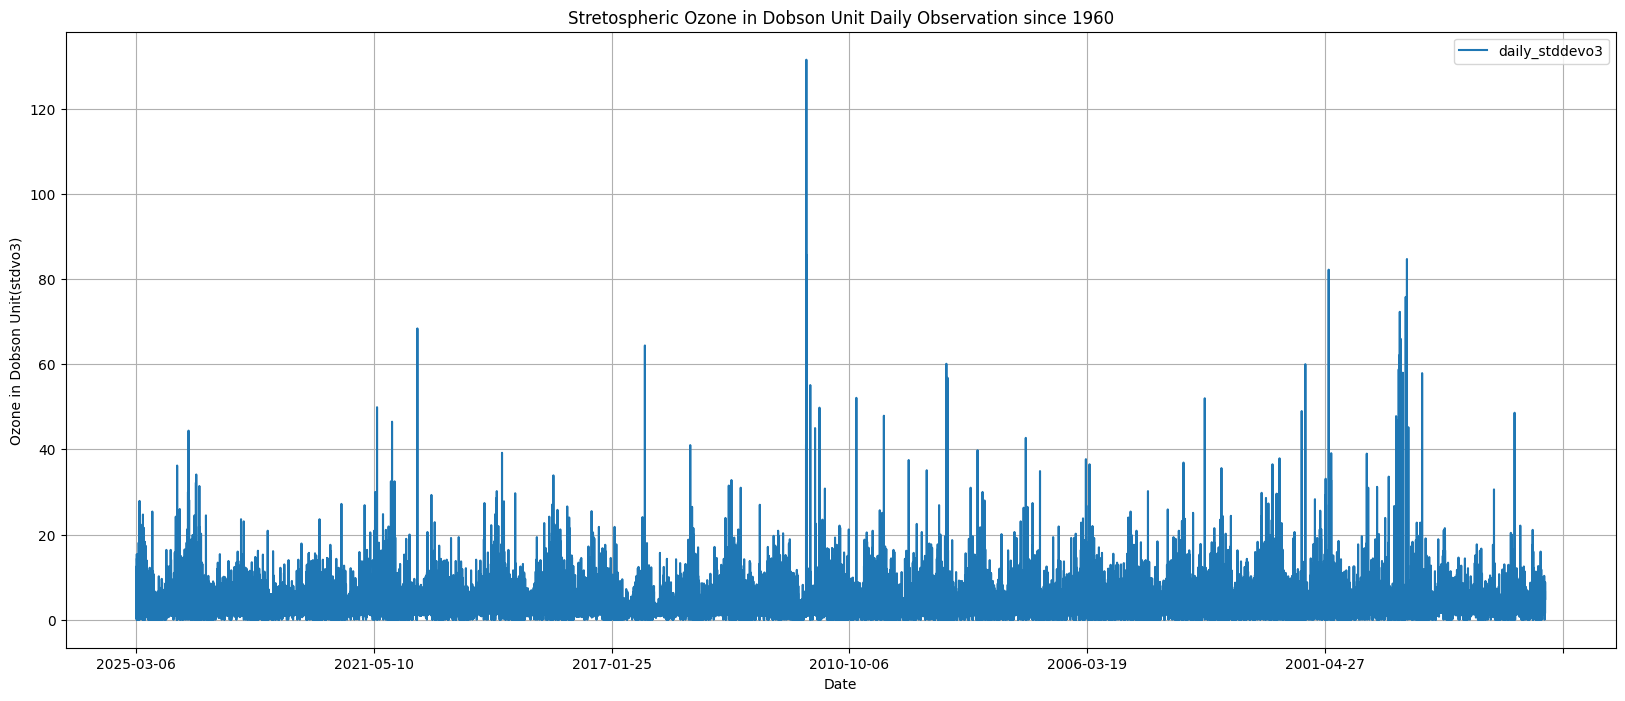

In [34]:
df_stdvo3 = df.copy()
df_stdvo3 = df_stdvo3.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
       'daily_columno3', 'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df_stdvo3 = df_stdvo3.drop_duplicates()
df_stdvo3 = df_stdvo3.dropna()
df_stdvo3 = df_stdvo3.set_index('daily_date')

df_stdvo3.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("Date")
plt.ylabel('Ozone in Dobson Unit(stdvo3)')
plt.grid()
plt.show()

In [54]:
df=df.drop(['Y', 'X', 'data_payload_id', 'instance_datetime', 'url', 'agency',
       'platform_type', 'platform_id', 'platform_name', 'gaw_id',
       'instrument_name', 'instrument_model', 'instrument_number',
       'monthly_date', 'monthly_stddevo3', 'monthly_npts','daily_stddevo3',
        'daily_wlcode', 'daily_obscode', 'monthly_columno3',
        'daily_utc_begin', 'daily_utc_end', 'daily_utc_mean',
       'daily_nobs', 'daily_mmu', 'daily_columnso2', 'latest_observation',
       'country', 'scientific_authority', 'version'], axis = 1)
df.head()

,daily_date,daily_columno3
0,2025-03-06,280.5
1,2025-03-27,310.2
2,2025-03-07,306.3
3,2025-03-05,319.4
4,2025-03-08,313.9


In [55]:
print(f"Date Range: {df.loc[:,'daily_date'][len(df)-1]} to {df.loc[:,'daily_date'][0]}")

Date Range: 1976-01-21 to 2025-03-06


In [56]:
df=df.drop_duplicates()
df=df.dropna()
# df=df.set_index('daily_date')
df.head()


,daily_date,daily_columno3
0,2025-03-06,280.5
1,2025-03-27,310.2
2,2025-03-07,306.3
3,2025-03-05,319.4
4,2025-03-08,313.9


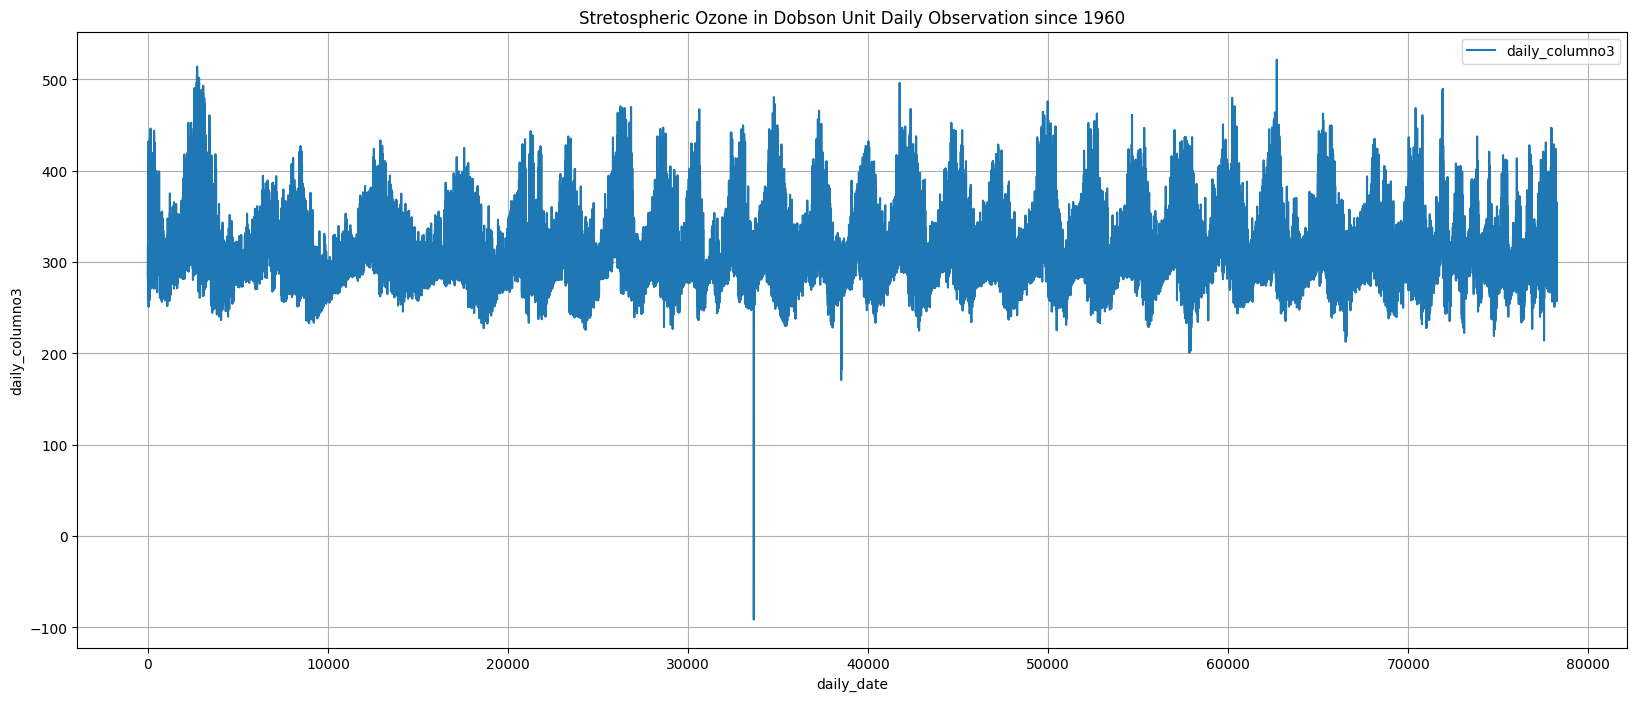

In [38]:
df.plot(figsize=(20,8))
plt.title("Stretospheric Ozone in Dobson Unit Daily Observation since 1960")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.grid()


In [57]:
round(df.describe(), 3)

,daily_columno3
count,65510.000
mean,310.114
std,34.389
min,-91.500
25%,286.000
50%,305.000
75%,328.600
max,521.800


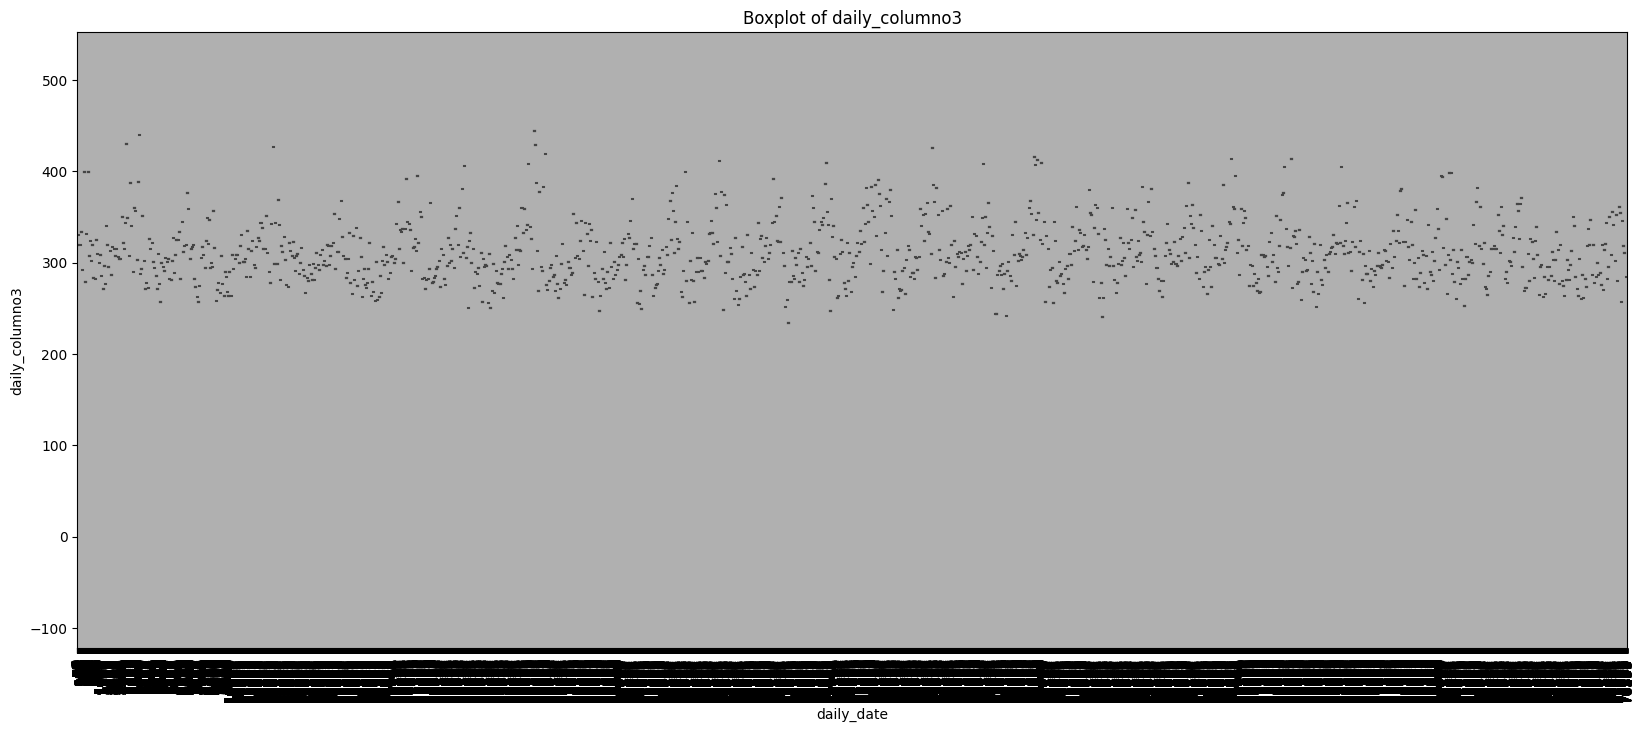

In [40]:
_,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index,y='daily_columno3',data=df,ax=ax)
ax.set_title("Boxplot of daily_columno3")
plt.xlabel("daily_date")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

In [41]:
df.head()
df.dtypes

daily_date         object
daily_columno3    float64
dtype: object

c:\Users\Abir Hossain\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


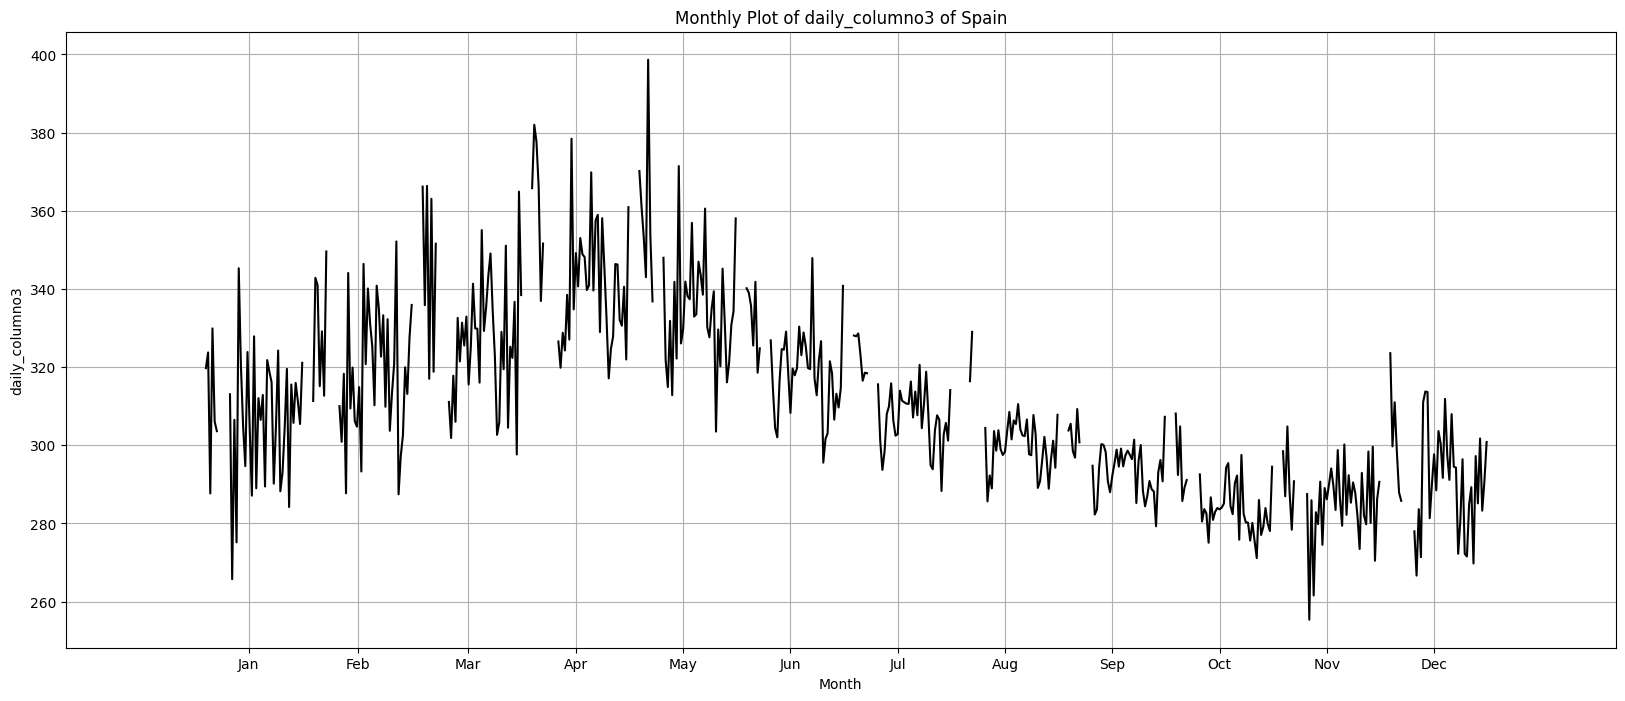

In [42]:
from statsmodels.graphics.tsaplots import month_plot

# Ensure 'daily_date' is in datetime format
df['daily_date'] = pd.to_datetime(df['daily_date'])

# Set 'daily_date' as the index
df = df.set_index('daily_date')

# Now resample and take the monthly mean
df_monthly_resampled = df['daily_columno3'].resample('M').mean()

# Plot using month_plot
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(20, 8))
month_plot(df_monthly_resampled, ylabel="Ozone", ax=ax)
plt.title("Monthly Plot of daily_columno3 of Spain")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.grid()
plt.show()

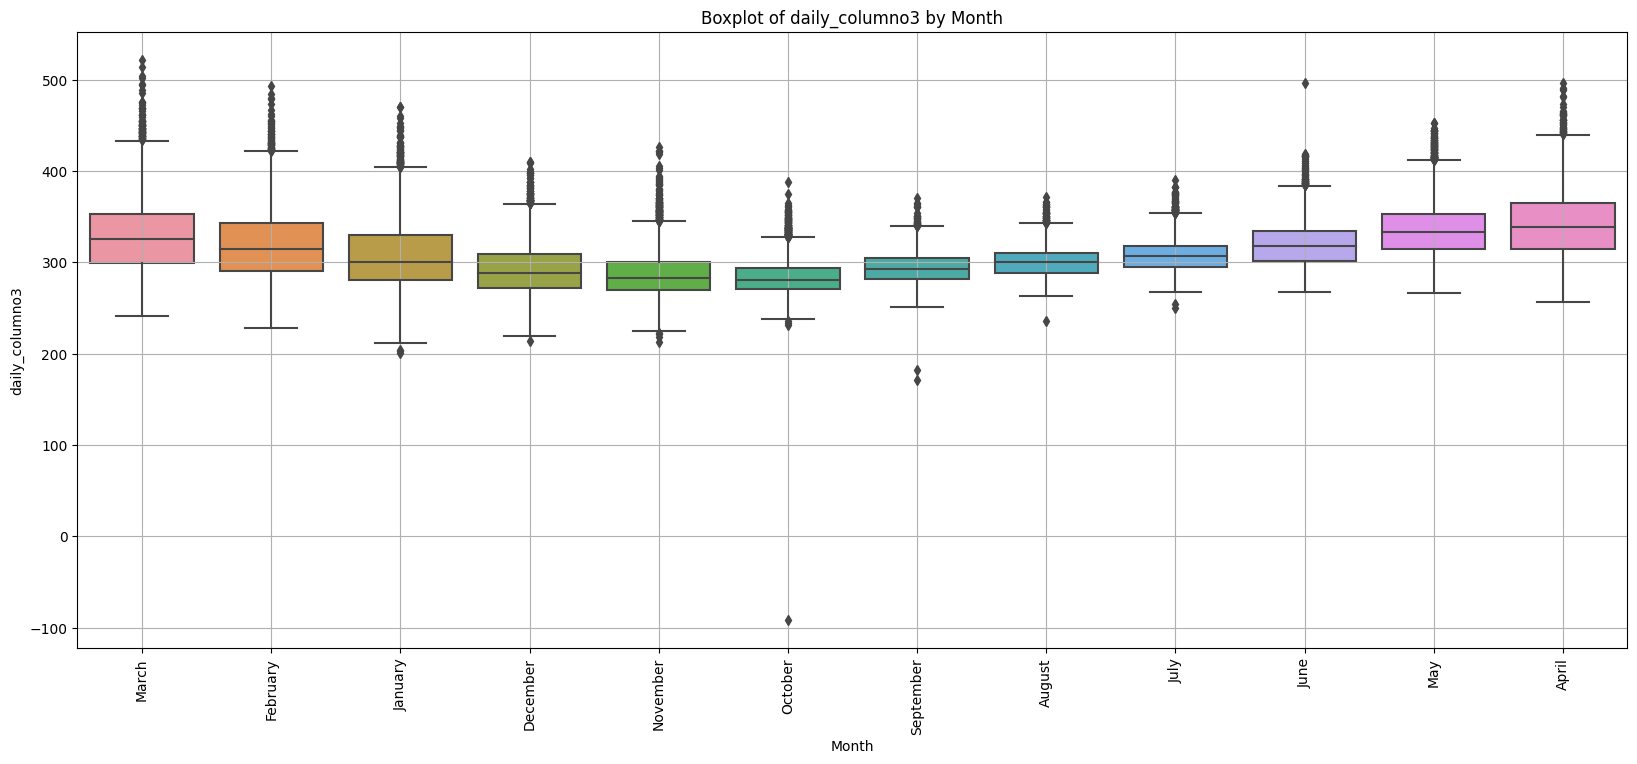

In [43]:
_ ,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y='daily_columno3',data=df,ax=ax)
plt.title("Boxplot of daily_columno3 by Month")
plt.xlabel("Month")
plt.ylabel('daily_columno3')
plt.xticks(rotation=90)
plt.grid()

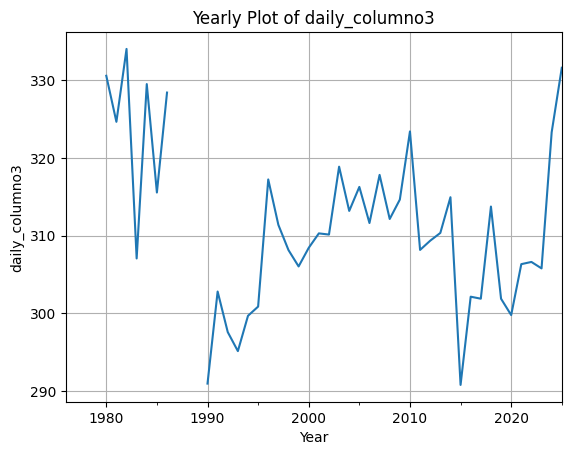

In [44]:
df_yearly_resampled = df['daily_columno3'].resample('A').mean()
df_yearly_resampled.plot()
plt.title("Yearly Plot of daily_columno3")
plt.xlabel("Year")
plt.ylabel('daily_columno3')
plt.grid()

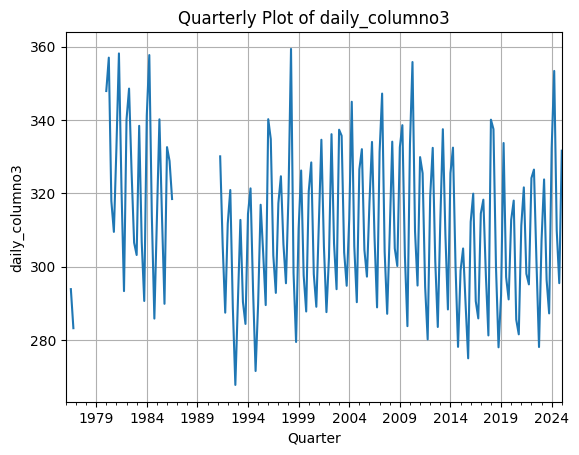

In [45]:
df_quarterly_resampled = df['daily_columno3'].resample('Q').mean()
df_quarterly_resampled.plot()
plt.title("Quarterly Plot of daily_columno3")
plt.xlabel("Quarter")
plt.ylabel('daily_columno3')
plt.grid()

<Figure size 1200x600 with 0 Axes>

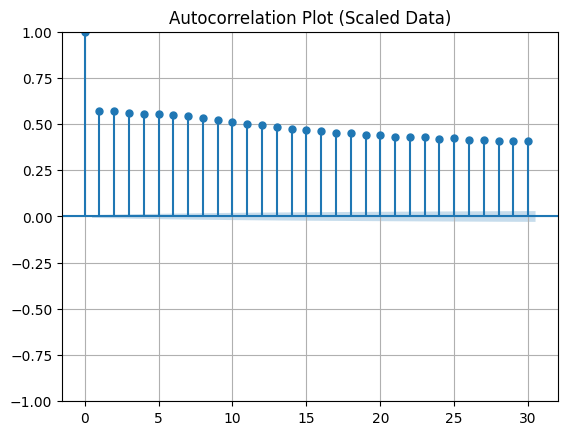

✅ Autocorrelation remains significant for all plotted lags.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# 1. Assume you already have your data
# Example:
# df = pd.read_csv('your_data.csv')

# 2. Scale the data
scaler = MinMaxScaler()
df['daily_columno3'] = scaler.fit_transform(df[['daily_columno3']])

# 3. Calculate ACF values on scaled data
acf_vals, confint = acf(df['daily_columno3'], nlags=30, alpha=0.05)

# 4. Calculate threshold from confidence interval
threshold = (confint[:,1] - confint[:,0]) / 2

# 5. Find first inconsistent lag
inconsistent_lag = None
for i, val in enumerate(acf_vals):
    if i == 0:  # Skip lag 0
        continue
    if abs(val) < threshold[i]:
        inconsistent_lag = i
        break

# 6. Plot ACF
plt.figure(figsize=(12,6))
plot_acf(df['daily_columno3'], lags=30, alpha=0.05)
plt.title('Autocorrelation Plot (Scaled Data)')
plt.grid()
plt.show()

# 7. Print result
if inconsistent_lag:
    print(f"👉 Autocorrelation becomes inconsistent after lag {inconsistent_lag}.")
else:
    print("✅ Autocorrelation remains significant for all plotted lags.")



In [61]:
df.head()

,daily_date,daily_columno3,rolling_avg,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15
15,1976-07-05,0.647970,299.100000,295.2,296.2,342.0,365.4,332.2,332.2,309.8,330.3,347.8,347.8,351.7,308.9,296.2,257.2,264.0
16,1976-07-06,0.651231,303.000000,305.9,295.2,296.2,342.0,365.4,332.2,332.2,309.8,330.3,347.8,347.8,351.7,308.9,296.2,257.2
17,1976-07-07,0.633784,303.666667,307.9,305.9,295.2,296.2,342.0,365.4,332.2,332.2,309.8,330.3,347.8,347.8,351.7,308.9,296.2
18,1976-07-08,0.622534,298.466667,297.2,307.9,305.9,295.2,296.2,342.0,365.4,332.2,332.2,309.8,330.3,347.8,347.8,351.7,308.9
19,1976-07-09,0.627425,293.600000,290.3,297.2,307.9,305.9,295.2,296.2,342.0,365.4,332.2,332.2,309.8,330.3,347.8,347.8,351.7


In [62]:
#df['daily_date'] = pd.to_datetime(df['daily_date'])

# 2. Sort the dataframe by the full date (oldest to latest)
df = df.sort_values('daily_date', ascending=True).reset_index(drop=True)

# Rolling average feature (7-day)
df['rolling_avg'] = df['daily_columno3'].rolling(window=3).mean().bfill()

df['lag1'] = df['daily_columno3'].shift(1)
df['lag2'] = df['daily_columno3'].shift(2)
df['lag3'] = df['daily_columno3'].shift(3)
df['lag4'] = df['daily_columno3'].shift(4)
df['lag5'] = df['daily_columno3'].shift(5)
df['lag6'] = df['daily_columno3'].shift(6)
df['lag7'] = df['daily_columno3'].shift(7)
df['lag8'] = df['daily_columno3'].shift(8)
df['lag9'] = df['daily_columno3'].shift(9)
df['lag10'] = df['daily_columno3'].shift(10)
df['lag11'] = df['daily_columno3'].shift(11)
df['lag12'] = df['daily_columno3'].shift(12)
df['lag13'] = df['daily_columno3'].shift(13)
df['lag14'] = df['daily_columno3'].shift(14)
df['lag15'] = df['daily_columno3'].shift(15)
df.dropna(inplace=True)
print(df.shape)
df.head()


(65480, 18)


,daily_date,daily_columno3,rolling_avg,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15
15,1976-09-07,0.595630,0.607805,0.621066,0.606718,0.613077,0.622534,0.630523,0.643241,0.638513,0.635252,0.630523,0.636882,0.627425,0.622534,0.633784,0.651231,0.647970
16,1976-09-08,0.613077,0.609924,0.595630,0.621066,0.606718,0.613077,0.622534,0.630523,0.643241,0.638513,0.635252,0.630523,0.636882,0.627425,0.622534,0.633784,0.651231
17,1976-09-09,0.611446,0.606718,0.613077,0.595630,0.621066,0.606718,0.613077,0.622534,0.630523,0.643241,0.638513,0.635252,0.630523,0.636882,0.627425,0.622534,0.633784
18,1976-09-10,0.611446,0.611990,0.611446,0.613077,0.595630,0.621066,0.606718,0.613077,0.622534,0.630523,0.643241,0.638513,0.635252,0.630523,0.636882,0.627425,0.622534
19,1976-09-13,0.651231,0.624708,0.611446,0.611446,0.613077,0.595630,0.621066,0.606718,0.613077,0.622534,0.630523,0.643241,0.638513,0.635252,0.630523,0.636882,0.627425


Model Evaluation Metrics:

----- Linear Regression -----
RMSE: 0.000
MAE : 0.000
R2  : 100.00 %

----- Decision Tree -----
RMSE: 0.009
MAE : 0.005
R2  : 97.00 %

----- Random Forest -----
RMSE: 0.005
MAE : 0.002
R2  : 99.00 %

----- Gradient Boosting -----
RMSE: 0.014
MAE : 0.010
R2  : 93.61 %

----- Support Vector Regressor -----
RMSE: 0.029
MAE : 0.023
R2  : 70.39 %



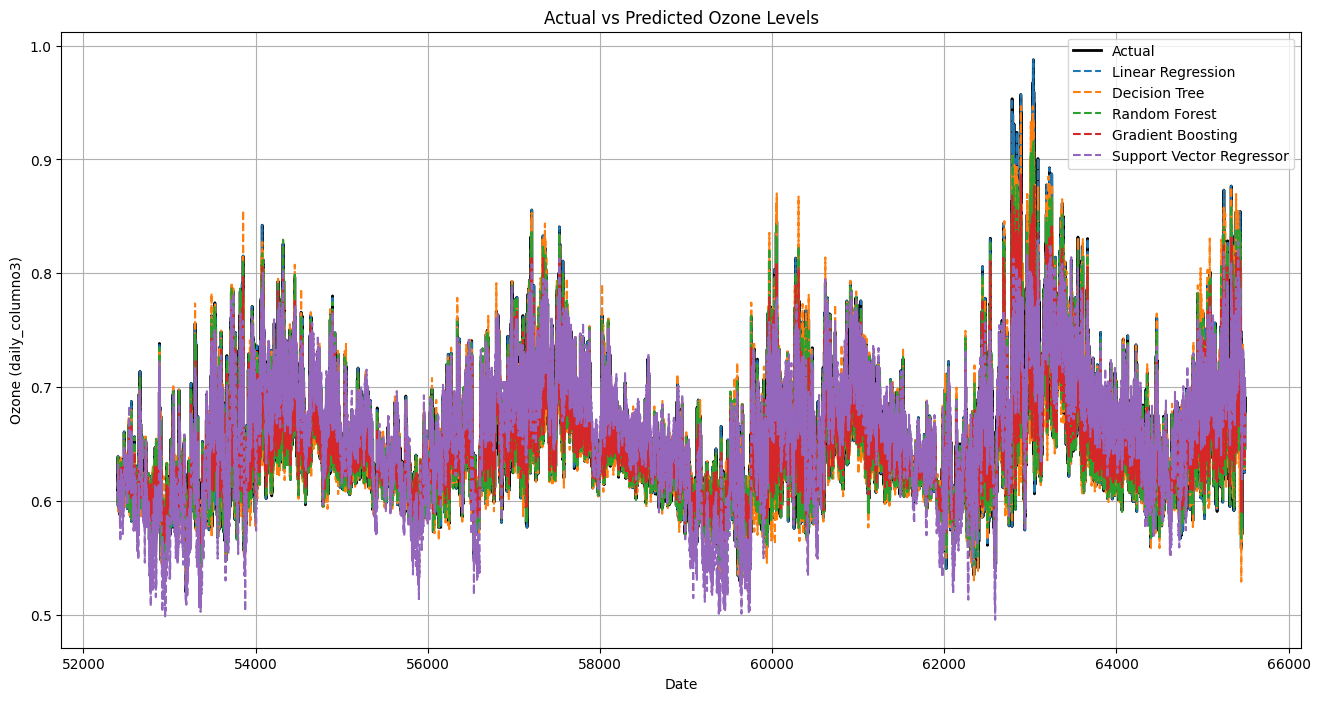

In [67]:

X = df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'rolling_avg']]
y = df['daily_columno3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# STEP 3: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

# STEP 4: Train, Predict, and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results[name] = {
        'Model': model,
        'Predictions': preds,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# STEP 5: Print evaluation metrics
print("Model Evaluation Metrics:\n")
for name, res in results.items():
    print(f"----- {name} -----")
    print(f"RMSE: {res['RMSE']:.3f}")
    print(f"MAE : {res['MAE']:.3f}")
    print(f"R2  : {(res['R2']*100):.2f} %\n")

# STEP 6: Plot actual vs predicted
plt.figure(figsize=(16, 8))

# Actual data
plt.plot(y_test.index, y_test.values, label='Actual', color='black', linewidth=2)

# Predictions from each model
for name, res in results.items():
    plt.plot(y_test.index, res['Predictions'], label=name, linestyle='--')

plt.title('Actual vs Predicted Ozone Levels')
plt.xlabel('Date')
plt.ylabel('Ozone (daily_columno3)')
plt.legend()
plt.grid(True)
plt.show()
